In [1]:
# Auto-reload module to access .py files easily
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append(os.path.abspath("../../datasets/rsna-2023-abdominal-trauma-detection"))

In [2]:
import matplotlib.pyplot as plt
import torch
import torchvision
from collections import Counter

from rsna_datasets import (
    Classification2DDataset, 
    Classification3DDataset, 
    MaskedClassification2DDataset, 
    MaskedClassification3DDataset, 
    Segmentation2DDataset, 
    Segmentation3DDataset
)

## Classification

Streaming dataset
- Data samples are downloaded on-demand and not saved to disk.
- Set num_worker > 0 to utilize multiprocessing so that data samples can be prefetched and preprocessed, and keep the GPU as occupied as possible during training.

In [3]:
cls2d_dataset = Classification2DDataset(split="train", streaming=True)
cls2d_dataloader = torch.utils.data.DataLoader(cls2d_dataset, batch_size=512, num_workers=4, pin_memory=True)

for batch_idx, batch in enumerate(cls2d_dataloader):
    if batch_idx == 5:
        break
    
    img = batch["img"]
    bowel = batch["bowel"]
    extravasation = batch["extravasation"]
    kidney = batch["kidney"]
    liver = batch["liver"]
    spleen = batch["spleen"]
    any_injury = batch["any_injury"]
    
    series_counts = dict(Counter(batch["series_id"].numpy()))
    print(f"batch_idx={batch_idx}")
    print(f"img={list(img.size())}, bowel={list(bowel.size())}, extravasation={list(extravasation.size())}, kidney={list(kidney.size())}, liver={list(liver.size())}, spleen={list(spleen.size())}, any_injury={list(batch['any_injury'].size())}")
    print(f"series_counts={series_counts}")
    print()

batch_idx=0
img=[512, 1, 224, 224], bowel=[512], extravasation=[512], kidney=[512], liver=[512], spleen=[512], any_injury=[512]
series_counts={21872: 147, 55910: 162, 27601: 176, 63666: 27}

batch_idx=1
img=[512, 1, 224, 224], bowel=[512], extravasation=[512], kidney=[512], liver=[512], spleen=[512], any_injury=[512]
series_counts={13664: 138, 44622: 148, 30990: 123, 15777: 103}

batch_idx=2
img=[512, 1, 224, 224], bowel=[512], extravasation=[512], kidney=[512], liver=[512], spleen=[512], any_injury=[512]
series_counts={23622: 216, 14060: 181, 29835: 115}

batch_idx=3
img=[512, 1, 224, 224], bowel=[512], extravasation=[512], kidney=[512], liver=[512], spleen=[512], any_injury=[512]
series_counts={62741: 196, 1320: 168, 10745: 148}

batch_idx=4
img=[512, 1, 224, 224], bowel=[512], extravasation=[512], kidney=[512], liver=[512], spleen=[512], any_injury=[512]
series_counts={63666: 141, 15782: 212, 23062: 159}



Unstreamed dataset
- The entire dataset are downloaded to local cache the first time when running the code.
- The subsequent run will not redownload the dataset and will simply access the dataset from the cache directory.
- Use this if your machine has enough disk space. (size of classification dataset: 90.09 GiB)

In [4]:
cls2d_dataset = Classification2DDataset(split="train", streaming=False) # Download data locally to cache dir first (only need to download once)
cls2d_dataloader = torch.utils.data.DataLoader(cls2d_dataset, batch_size=512, num_workers=4, pin_memory=True)

for batch_idx, batch in enumerate(cls2d_dataloader):
    if batch_idx == 5:
        break
    
    img = batch["img"]
    bowel = batch["bowel"]
    extravasation = batch["extravasation"]
    kidney = batch["kidney"]
    liver = batch["liver"]
    spleen = batch["spleen"]
    any_injury = batch["any_injury"]
    
    series_counts = dict(Counter(batch["series_id"].numpy()))
    print(f"batch_idx={batch_idx}")
    print(f"img={list(img.size())}, bowel={list(bowel.size())}, extravasation={list(extravasation.size())}, kidney={list(kidney.size())}, liver={list(liver.size())}, spleen={list(spleen.size())}, any_injury={list(batch['any_injury'].size())}")
    print(f"series_counts={series_counts}")
    print()

batch_idx=0
img=[512, 1, 224, 224], bowel=[512], extravasation=[512], kidney=[512], liver=[512], spleen=[512], any_injury=[512]
series_counts={21872: 147, 55910: 162, 27601: 176, 63666: 27}

batch_idx=1
img=[512, 1, 224, 224], bowel=[512], extravasation=[512], kidney=[512], liver=[512], spleen=[512], any_injury=[512]
series_counts={13664: 138, 44622: 148, 30990: 123, 15777: 103}

batch_idx=2
img=[512, 1, 224, 224], bowel=[512], extravasation=[512], kidney=[512], liver=[512], spleen=[512], any_injury=[512]
series_counts={23622: 216, 14060: 181, 29835: 115}

batch_idx=3
img=[512, 1, 224, 224], bowel=[512], extravasation=[512], kidney=[512], liver=[512], spleen=[512], any_injury=[512]
series_counts={62741: 196, 1320: 168, 10745: 148}

batch_idx=4
img=[512, 1, 224, 224], bowel=[512], extravasation=[512], kidney=[512], liver=[512], spleen=[512], any_injury=[512]
series_counts={63666: 141, 15782: 212, 23062: 159}



Modify the configurations of predefined `slice_transforms`

In [5]:
slice_transform_configs = {
    "crop_strategy": "random", # center, ten, five
    "shorter_edge_length": 256, # default: 256
    "slice_size": (150, 150), # default: (224, 224)
}

cls2d_dataset = Classification2DDataset(split="train", streaming=True, slice_transform_configs=slice_transform_configs)
cls2d_dataloader = torch.utils.data.DataLoader(cls2d_dataset, batch_size=512, num_workers=4, pin_memory=True)

for batch_idx, batch in enumerate(cls2d_dataloader):
    if batch_idx == 5:
        break
    
    img = batch["img"]
    bowel = batch["bowel"]
    extravasation = batch["extravasation"]
    kidney = batch["kidney"]
    liver = batch["liver"]
    spleen = batch["spleen"]
    any_injury = batch["any_injury"]
    
    series_counts = dict(Counter(batch["series_id"].numpy()))
    print(f"batch_idx={batch_idx}")
    print(f"img={list(img.size())}, bowel={list(bowel.size())}, extravasation={list(extravasation.size())}, kidney={list(kidney.size())}, liver={list(liver.size())}, spleen={list(spleen.size())}, any_injury={list(batch['any_injury'].size())}")
    print(f"series_counts={series_counts}")
    print()

batch_idx=0
img=[512, 1, 150, 150], bowel=[512], extravasation=[512], kidney=[512], liver=[512], spleen=[512], any_injury=[512]
series_counts={21872: 147, 55910: 162, 27601: 176, 63666: 27}

batch_idx=1
img=[512, 1, 150, 150], bowel=[512], extravasation=[512], kidney=[512], liver=[512], spleen=[512], any_injury=[512]
series_counts={13664: 138, 44622: 148, 30990: 123, 15777: 103}

batch_idx=2
img=[512, 1, 150, 150], bowel=[512], extravasation=[512], kidney=[512], liver=[512], spleen=[512], any_injury=[512]
series_counts={23622: 216, 14060: 181, 29835: 115}

batch_idx=3
img=[512, 1, 150, 150], bowel=[512], extravasation=[512], kidney=[512], liver=[512], spleen=[512], any_injury=[512]
series_counts={62741: 196, 1320: 168, 10745: 148}

batch_idx=4
img=[512, 1, 150, 150], bowel=[512], extravasation=[512], kidney=[512], liver=[512], spleen=[512], any_injury=[512]
series_counts={63666: 141, 15782: 212, 23062: 159}



Modify the configurations of predefined `volume_transforms`

In [6]:
slice_transform_configs = {
    "crop_strategy": "random", # center, ten, five
    "shorter_edge_length": 256, # default: 256
    "slice_size": (150, 150), # default: (224, 224)
}
volume_transform_configs = {
    "crop_strategy": "random",
    "voxel_spacing": (3.0, 3.0, 3.0),
    "volume_size": (96, 96, 96),
    "axcodes": "RAS",
}

cls2d_dataset = Classification2DDataset(split="train", streaming=True, slice_transform_configs=slice_transform_configs, volume_transform_configs=volume_transform_configs)
cls2d_dataloader = torch.utils.data.DataLoader(cls2d_dataset, batch_size=512, num_workers=4, pin_memory=True)

for batch_idx, batch in enumerate(cls2d_dataloader):
    if batch_idx == 5:
        break
    
    img = batch["img"]
    bowel = batch["bowel"]
    extravasation = batch["extravasation"]
    kidney = batch["kidney"]
    liver = batch["liver"]
    spleen = batch["spleen"]
    any_injury = batch["any_injury"]
    
    series_counts = dict(Counter(batch["series_id"].numpy()))
    print(f"batch_idx={batch_idx}")
    print(f"img={list(img.size())}, bowel={list(bowel.size())}, extravasation={list(extravasation.size())}, kidney={list(kidney.size())}, liver={list(liver.size())}, spleen={list(spleen.size())}, any_injury={list(batch['any_injury'].size())}")
    print(f"series_counts={series_counts}")
    print()

batch_idx=0
img=[512, 1, 150, 150], bowel=[512], extravasation=[512], kidney=[512], liver=[512], spleen=[512], any_injury=[512]
series_counts={21872: 96, 55910: 96, 27601: 96, 63666: 96, 15782: 96, 23062: 32}

batch_idx=1
img=[512, 1, 150, 150], bowel=[512], extravasation=[512], kidney=[512], liver=[512], spleen=[512], any_injury=[512]
series_counts={13664: 96, 44622: 96, 30990: 96, 15777: 96, 30334: 96, 7987: 32}

batch_idx=2
img=[512, 1, 150, 150], bowel=[512], extravasation=[512], kidney=[512], liver=[512], spleen=[512], any_injury=[512]
series_counts={23622: 96, 14060: 96, 29835: 96, 15406: 96, 62641: 96, 2260: 32}

batch_idx=3
img=[512, 1, 150, 150], bowel=[512], extravasation=[512], kidney=[512], liver=[512], spleen=[512], any_injury=[512]
series_counts={62741: 96, 1320: 96, 10745: 96, 32240: 96, 2703: 96, 687: 32}

batch_idx=4
img=[512, 1, 150, 150], bowel=[512], extravasation=[512], kidney=[512], liver=[512], spleen=[512], any_injury=[512]
series_counts={23062: 64, 10084: 96, 4

Use custom transforms

batch_idx=0
img=[1, 1, 224, 224], bowel=[1], extravasation=[1], kidney=[1], liver=[1], spleen=[1], any_injury=[1]
series_counts={21872: 1}



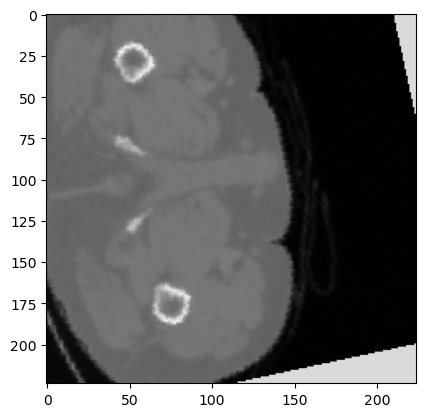

batch_idx=1
img=[1, 1, 224, 224], bowel=[1], extravasation=[1], kidney=[1], liver=[1], spleen=[1], any_injury=[1]
series_counts={13664: 1}



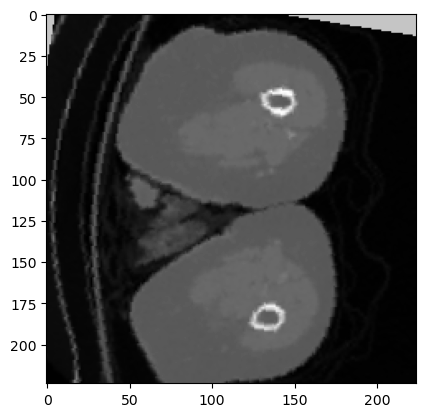

batch_idx=2
img=[1, 1, 224, 224], bowel=[1], extravasation=[1], kidney=[1], liver=[1], spleen=[1], any_injury=[1]
series_counts={23622: 1}



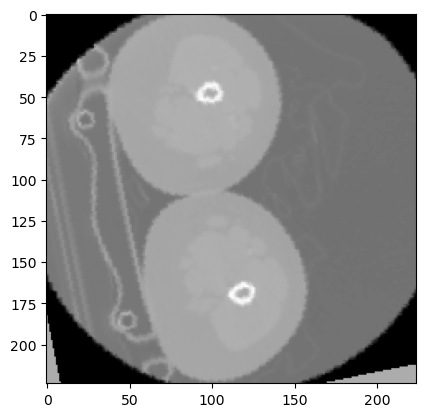

batch_idx=3
img=[1, 1, 224, 224], bowel=[1], extravasation=[1], kidney=[1], liver=[1], spleen=[1], any_injury=[1]
series_counts={62741: 1}



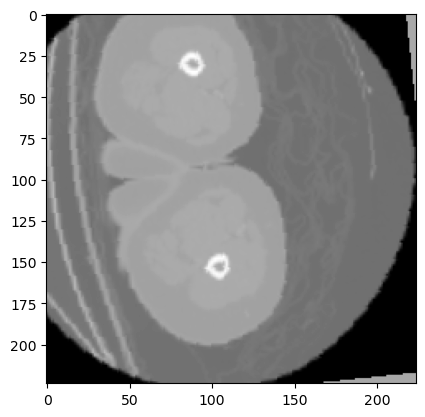

batch_idx=4
img=[1, 1, 224, 224], bowel=[1], extravasation=[1], kidney=[1], liver=[1], spleen=[1], any_injury=[1]
series_counts={21872: 1}



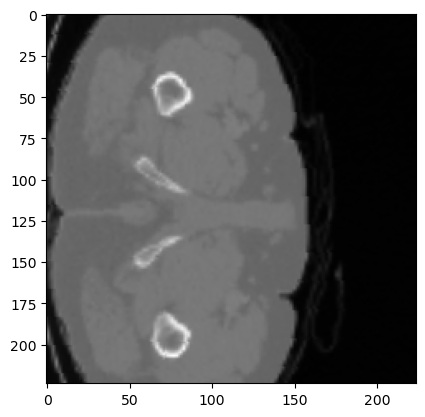

In [7]:
slice_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=256),
    torchvision.transforms.RandomRotation(degrees=15),
    torchvision.transforms.RandomCrop(size=(224, 224)),
])

cls2d_dataset = Classification2DDataset(split="train", streaming=True, slice_transforms=slice_transforms)
cls2d_dataloader = torch.utils.data.DataLoader(cls2d_dataset, batch_size=1, num_workers=4, pin_memory=True)

for batch_idx, batch in enumerate(cls2d_dataloader):
    if batch_idx == 5:
        break
    
    img = batch["img"]
    bowel = batch["bowel"]
    extravasation = batch["extravasation"]
    kidney = batch["kidney"]
    liver = batch["liver"]
    spleen = batch["spleen"]
    any_injury = batch["any_injury"]
    
    series_counts = dict(Counter(batch["series_id"].numpy()))
    print(f"batch_idx={batch_idx}")
    print(f"img={list(img.size())}, bowel={list(bowel.size())}, extravasation={list(extravasation.size())}, kidney={list(kidney.size())}, liver={list(liver.size())}, spleen={list(spleen.size())}, any_injury={list(batch['any_injury'].size())}")
    print(f"series_counts={series_counts}")
    print()
    
    plt.imshow(img.numpy()[0, 0, :, :], cmap="gray")
    plt.show()

## Classification with segmentation masks

## Segmentation